In [6]:

%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pandas.read_csv('uber-raw-data-jun14.csv')

In [8]:
data.tail()


,Date/Time,Lat,Lon,Base
663839,6/30/2014 22:40:00,40.7332,-73.9872,B02764
663840,6/30/2014 23:12:00,40.7905,-73.9796,B02764
663841,6/30/2014 23:13:00,40.7640,-73.9887,B02764
663842,6/30/2014 23:15:00,40.7262,-73.9944,B02764
663843,6/30/2014 23:35:00,40.7404,-73.9848,B02764


In [9]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [10]:

data.tail()

,Date/Time,Lat,Lon,Base
663839,2014-06-30 22:40:00,40.7332,-73.9872,B02764
663840,2014-06-30 23:12:00,40.7905,-73.9796,B02764
663841,2014-06-30 23:13:00,40.7640,-73.9887,B02764
663842,2014-06-30 23:15:00,40.7262,-73.9944,B02764
663843,2014-06-30 23:35:00,40.7404,-73.9848,B02764


In [11]:

def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [12]:

data.tail()

,Date/Time,Lat,Lon,Base,dom
663839,2014-06-30 22:40:00,40.7332,-73.9872,B02764,30
663840,2014-06-30 23:12:00,40.7905,-73.9796,B02764,30
663841,2014-06-30 23:13:00,40.7640,-73.9887,B02764,30
663842,2014-06-30 23:15:00,40.7262,-73.9944,B02764,30
663843,2014-06-30 23:35:00,40.7404,-73.9848,B02764,30


In [13]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
data['Date/Time']=data['Date/Time'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


Text(0.5, 1.0, 'The distribution of number of pickups on each part of the day')

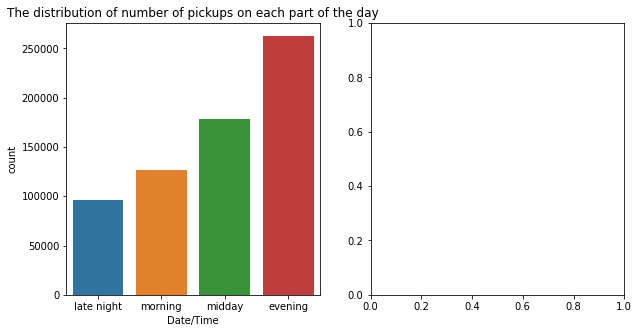

In [14]:
figure,ax=plt.subplots(ncols=2,figsize=(10,5))
seaborn.countplot(x='Date/Time',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')


In [16]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

AttributeError: 'str' object has no attribute 'weekday'

Text(0.5, 1.0, 'Frequency by DoM - uber - jun 2014')

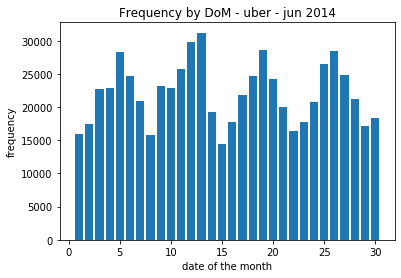

In [19]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - jun 2014')

In [15]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     15967
2     17503
3     22674
4     22831
5     28371
6     24683
7     20889
8     15749
9     23244
10    22874
11    25716
12    29844
13    31207
14    19327
15    14511
16    17778
17    21807
18    24647
19    28594
20    24271
21    19940
22    16322
23    17735
24    20779
25    26460
26    28516
27    24895
28    21208
29    17107
30    18395
dtype: int64

<BarContainer object of 30 artists>

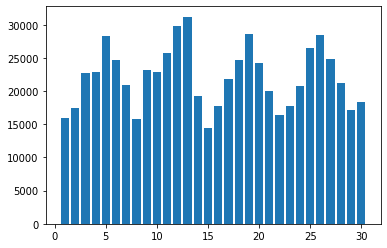

In [16]:
bar(range(1, 31), by_date)

In [17]:

by_date_sorted = by_date.sort_values()
by_date_sorted

dom
15    14511
8     15749
1     15967
22    16322
29    17107
2     17503
23    17735
16    17778
30    18395
14    19327
21    19940
24    20779
7     20889
28    21208
17    21807
3     22674
4     22831
10    22874
9     23244
20    24271
18    24647
6     24683
27    24895
11    25716
25    26460
5     28371
26    28516
19    28594
12    29844
13    31207
dtype: int64

''

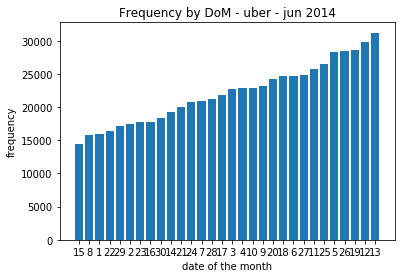

In [20]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - jun 2014')
;

In [ ]:
#15 june 2014 was father's day(it was on sunday)so most poeple must have gone to their homez on 13 (friday) which goves 2 days t spend time with their family


Text(0.5, 1.0, 'frequency of pick ups based on hours')

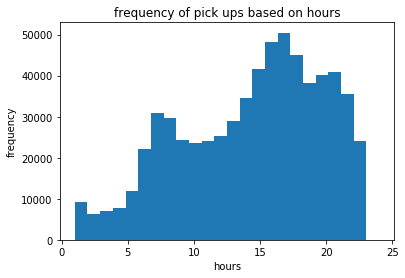

In [43]:
hist(data.hour, bins=24, range=(1, 24))
xlabel('hours')
ylabel('frequency')
title('frequency of pick ups based on hours')

Text(0.5, 1.0, 'frequency of pick ups based on days')

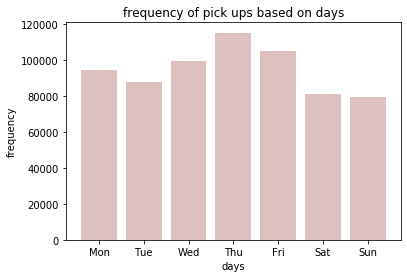

In [44]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
xlabel('days')
ylabel('frequency')
title('frequency of pick ups based on days')

In [45]:

by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

Text(0.5, 1, 'cross analysis of frequency based on hour and weekday')

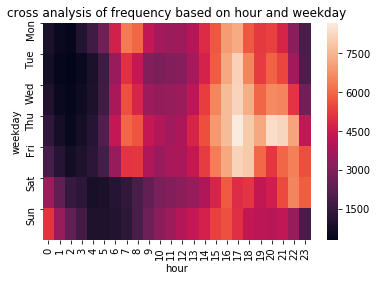

In [46]:
seaborn.heatmap(by_cross)
yticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
title('cross analysis of frequency based on hour and weekday')

''

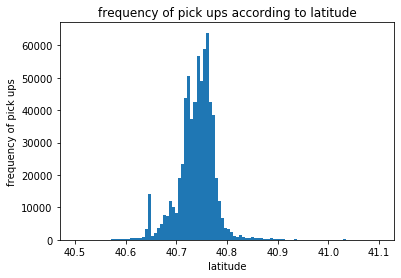

In [30]:

hist(data['Lat'], bins=100,range=(40.5,41.1))
xlabel('latitude')
ylabel('frequency of pick ups')
title('frequency of pick ups according to latitude')
;

''

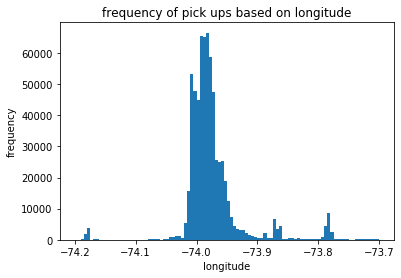

In [47]:
hist(data['Lon'], bins=100,range=(-74.2,-73.7))
xlabel('longitude')
ylabel('frequency')
title('frequency of pick ups based on longitude')
;

''

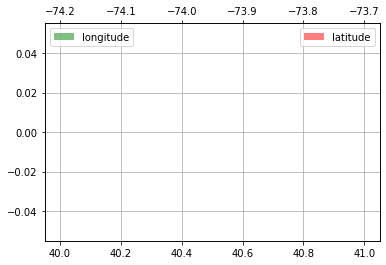

In [38]:

hist(data['Lon'], bins=100, range = (40,41), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (-74.2,-73.7), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

In [1]:
figure(figsize=(7, 7))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.5, 41)
xlabel('latitude')
ylabel('longitude')

NameError: name 'figure' is not defined